# <FONT COLOR='red'>***Linear Regression***</FONT>
---
---
To understand better the mathematic behain the Linear Regression models, in this notebook I realize step by step all the creation of the Linear Regression model only using mathematics.

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CREATE THE DATA OF THE FEATURE (X)
x = [1,2,2,3,4,4,5,6]
# CREATE THE DATA OF THE LABEL (Y)
y = [2,3,4,4,4,6,5,7]

# DATAFRAME CREATION
df_origin = pd.DataFrame({'x':x, 'y':y})

display(df_origin)

,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [3]:
# CREATE A DATAFRAME COPY TO MODIFY
df = df_origin.copy()

"""
INSERT COLUMNS THAT REPRESENT THE RESULT OF DIFFERENTE OPERATIONS WITH X AND Y
DATA.
"""
df.insert(df.shape[-1], 'xy', pd.Series(df['x']*df['y']))
df.insert(df.shape[-1], 'x^2', pd.Series(np.power(df['x'],2)))
df.loc['subtotal'] = df.sum()

display(df)

,x,y,xy,x^2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36
subtotal,27,35,135,111


In [4]:
# GET THE NECESSARY VALUES TO CALCULATE THE SLOPE
n = df_origin.shape[0]
sum_xy = df['xy'].loc['subtotal']
sum_x = df['x'].loc['subtotal']
sum_y = df['y'].loc['subtotal']
sum_x2 = df['x^2'].loc['subtotal']

m = (n*sum_xy - sum_x*sum_y)/(n*sum_x2 - np.power(sum_x,2))

# CALCULATE THE INTERCEPT
b = (sum_y/n) - (m*(sum_x/n))

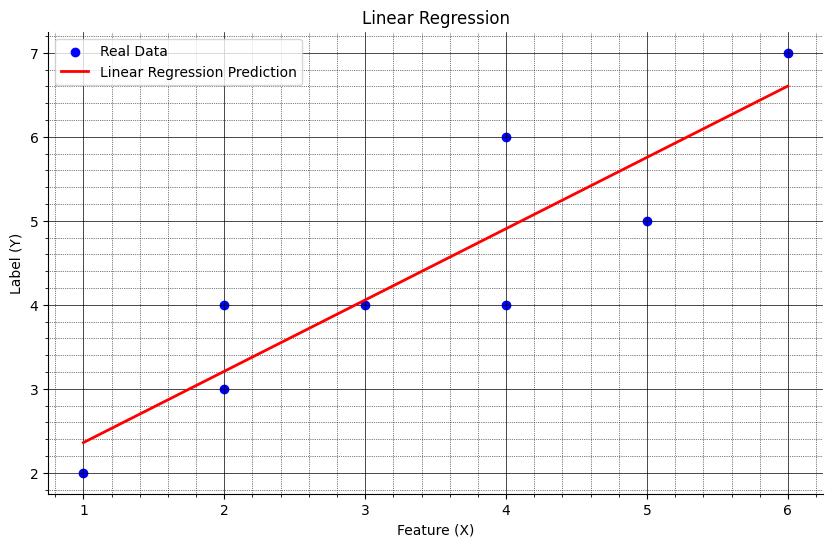

In [5]:
"""
CREATE THE FIGURE THAT CONTAIN THE RAL DATA AND THE LINEAR REGRESSION PREDICTION
LINE.
"""
plt.figure(figsize=(10,6))

# REAL DATA
plt.scatter(df_origin['x'], df_origin['y'], label='Real Data', color='blue', linewidth=1)

# LINEAR REGRESSION PREDICTION LINE
plt.plot(df_origin['x'], m*df_origin['x'] + b, label='Linear Regression Prediction', color='red', linewidth=2)

# TAGS
plt.xlabel('Feature (X)')
plt.ylabel('Label (Y)')
plt.title('Linear Regression')
plt.legend()

# GRID
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# DROP THE TOP AND LEFT BORDERS
sns.despine()

# SHOW FIGURE
plt.show()

In [6]:
# CREATE A DATAFRAME COPY
df_copy = df.copy()

# CALCULATE THE DIFFERENCE BETWEEN THE REAL AND PREDICT LABEL
diferencia = pd.Series(df_origin['y'] - (m*df_origin['x'] + b))

# DROP THE LAST ROW
df_copy.drop(df_copy.tail(1).index, inplace=True)

# INSERT THE DIFFERENCE
df_copy.insert(df_copy.shape[-1], 'y-y_pred', diferencia)

# INSERT THE SQUARED DIFFERENCE
df_copy.insert(df_copy.shape[-1], '(y-y_pred)^2', np.power(df_copy['y-y_pred'],2))

# INSERT THE SUBTOTAL OF THE SQUARED DIFFERENCE
df_copy.insert(df_copy.shape[-1], '(1/n)*(y-y_pred)^2', pd.Series((1/n)*df_copy['(y-y_pred)^2']))

# CREATE AGAIN THE LAST ROW OF THE DATAFRAME
df_copy.loc['subtotal'] = df_copy.sum()

display(df_copy)

,x,y,xy,x^2,y-y_pred,(y-y_pred)^2,(1/n)*(y-y_pred)^2
0,1.0,2.0,2.0,1.0,-3.584906e-01,0.128515,0.016064
1,2.0,3.0,6.0,4.0,-2.075472e-01,0.043076,0.005384
2,2.0,4.0,8.0,4.0,7.924528e-01,0.627981,0.078498
3,3.0,4.0,12.0,9.0,-5.660377e-02,0.003204,0.000400
4,4.0,4.0,16.0,16.0,-9.056604e-01,0.820221,0.102528
5,4.0,6.0,24.0,16.0,1.094340e+00,1.197579,0.149697
6,5.0,5.0,25.0,25.0,-7.547170e-01,0.569598,0.071200
7,6.0,7.0,42.0,36.0,3.962264e-01,0.156995,0.019624
subtotal,27.0,35.0,135.0,111.0,1.776357e-15,3.547170,0.443396


In [7]:
# CALCULATE THE MEAN SQUARED ERROR
mse = df_copy['(1/n)*(y-y_pred)^2'].loc['subtotal']

# CALCULATE THE ROOT MEAN SQUARED ERROR
rmse = np.sqrt(mse)

# CREATE A NEW DATAFRAME TO THE ERRORS
result_df = pd.DataFrame({'mse': [mse], 'rmse': [rmse]})

display(result_df)

,mse,rmse
0,0.443396,0.66588


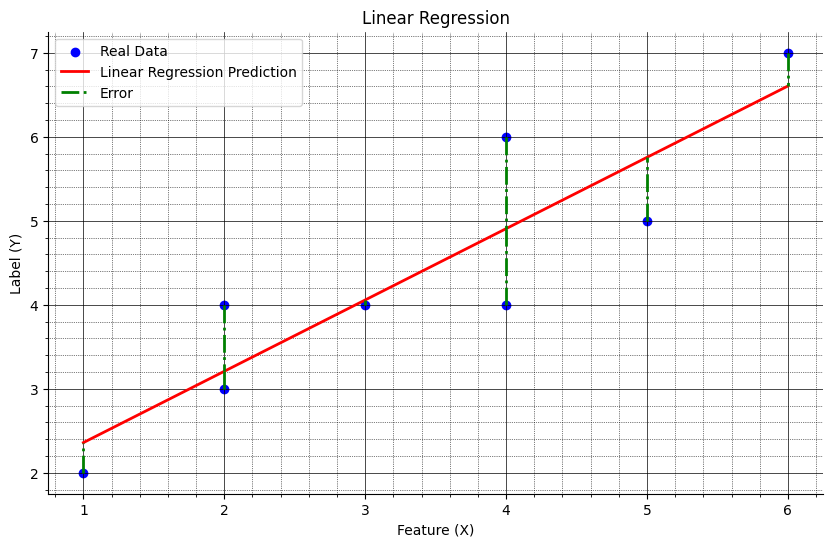

In [8]:
# FIGURE OF THE LINEAR REGRESSION WITH THE ERROR
plt.figure(figsize=(10,6))

# REAL DATA
plt.scatter(df_origin['x'], df_origin['y'], color='blue', linewidth=1)

# LINEAR REGRESSION LINE.
plt.plot(df_origin['x'], m*df_origin['x'] + b, color='red', linewidth=2)

# ERROR
plt.plot([df_origin['x'], df_origin['x']], [df_origin['y'], m*df_origin['x'] + b], color='green', linestyle='-.', linewidth=2)

# TAFS
plt.xlabel('Feature (X)')
plt.ylabel('Label (Y)')
plt.title('Linear Regression')
plt.legend(labels=['Real Data', 'Linear Regression Prediction', 'Error'])

# GRID
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# DROP THE TOP AND LEFT BORDERS
sns.despine()

plt.show()

In [11]:
# CALCULATE RESIDUALS
y_pred = m * df_origin['x'] + b
residual = df_origin['y'] - (m * df_origin['x'] + b)
zeros = np.zeros(len(residual))

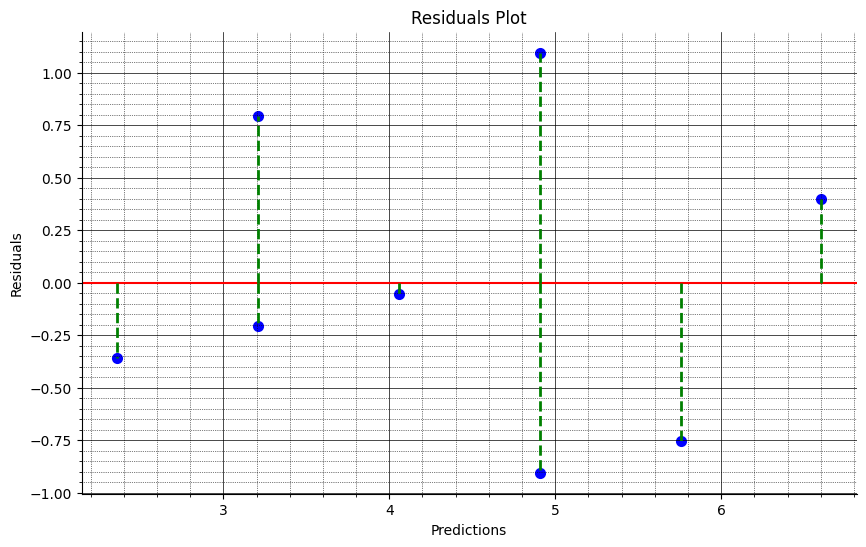

In [13]:
# CREATE RESIDUALS FIGURE
plt.figure(figsize=(10,6))

# RESIDUALS
plt.scatter(y_pred, residual, color='blue', linewidths=2)

# REFERENCE LINE
plt.axhline(y=0, color='red')

# RESIDUAL DISTANCE TO REFERENCE LINE
plt.plot([y_pred, y_pred], [zeros, residual], color='green', linestyle='--', linewidth=2)

# TAGS
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# GRID
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# REMOVE THE TOP AND LEFT BORDES
sns.despine()

plt.show()